In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import skew
import pylab as p 
import matplotlib.cm as cm
%matplotlib inline
%pylab inline
import re
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
data=pd.read_excel("C:\\Users\\Hp\\OneDrive\\Desktop\\relapse\\data.xlsx")

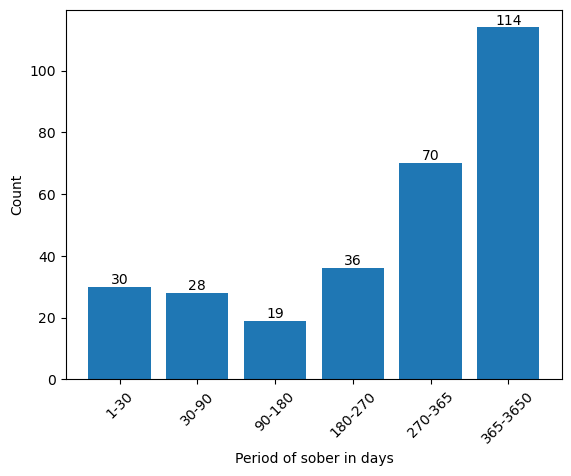

In [4]:
bins = [1, 30, 90, 180, 270,365,3650] 
labels = ['1-30', '30-90', '90-180','180-270','270-365','365-3650']

# Cut the data into the specified bins and count the occurrences
counts = pd.cut(data['Period of sober'], bins=bins,labels=labels).value_counts(sort=False)

# Plot the histogram with labels
plt.bar(labels, counts)
plt.xticks(rotation=45)

# Add count labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set the x-axis and y-axis labels
plt.xlabel('Period of sober in days')
plt.ylabel('Count')

# Show the plot
plt.show()

In [5]:
data_copy5 = data[(data['Period of sober']>270) & (data['Period of sober']<=365)].copy()

In [6]:
data_copy3 = data[(data['Period of sober']>365) & (data['Period of sober']<=3650)].copy()

In [7]:
data['PCP_aggressive outbursts'].value_counts()

0    264
1     39
Name: PCP_aggressive outbursts, dtype: int64

In [8]:
data['PCPR_aggressive outbursts'].value_counts()

0    267
1     36
Name: PCPR_aggressive outbursts, dtype: int64

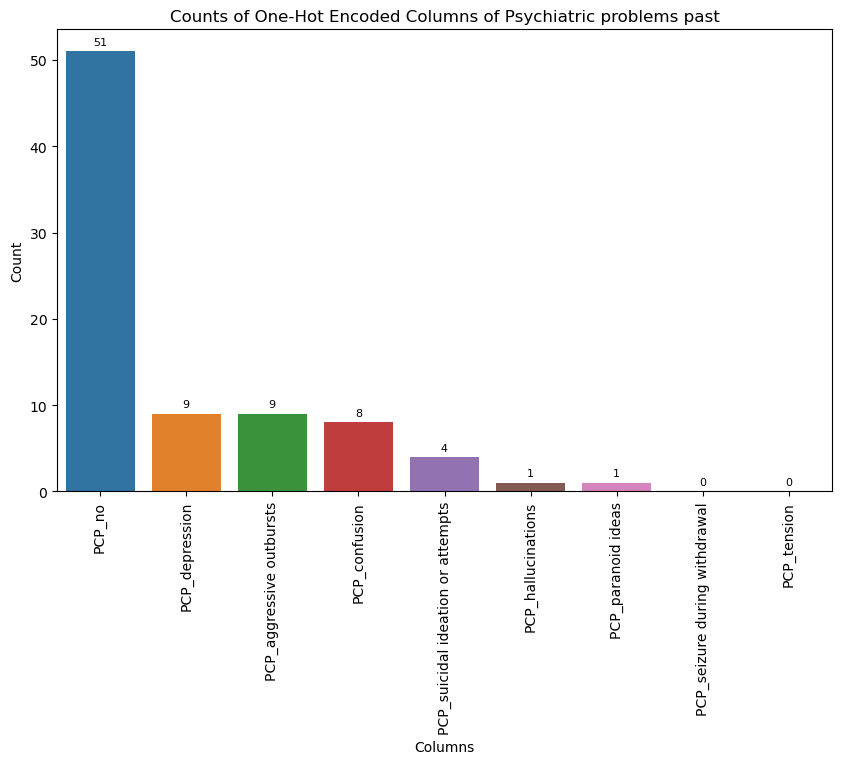

In [9]:

# Select the one-hot encoded columns
one_hot_cols = ['PCP_seizure during withdrawal','PCP_confusion','PCP_no','PCP_depression','PCP_aggressive outbursts','PCP_hallucinations','PCP_paranoid ideas','PCP_suicidal ideation or attempts','PCP_tension']

# Calculate the counts for each category in the one-hot encoded columns
value_counts = data_copy5[one_hot_cols].sum().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=value_counts.index, y=value_counts)

plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Counts of One-Hot Encoded Columns of Psychiatric problems past")

for i, v in enumerate(value_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

plt.show()

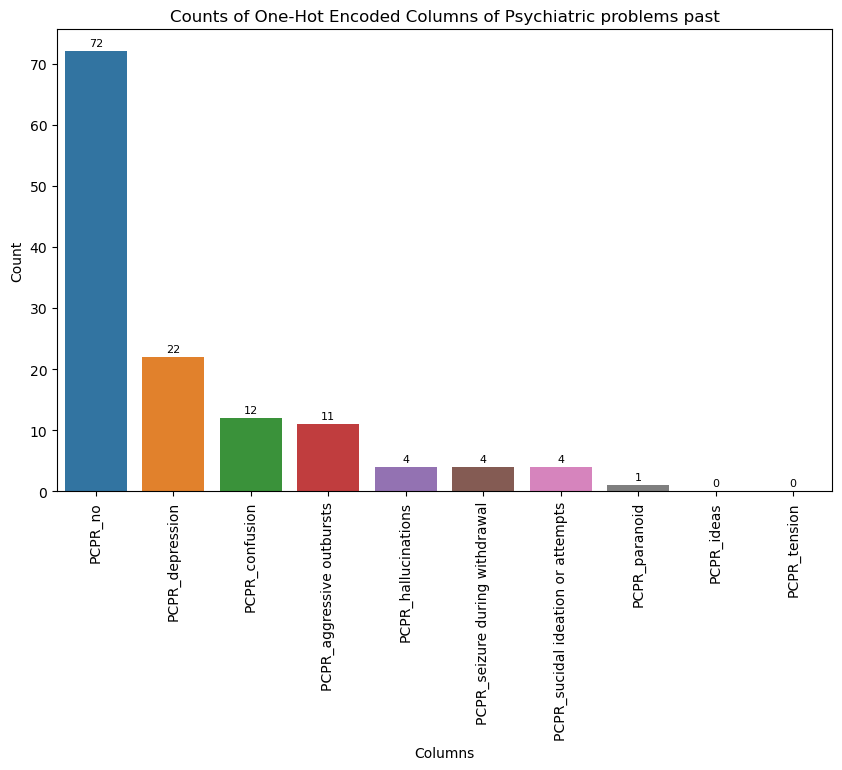

In [10]:

# Select the one-hot encoded columns
one_hot_cols = ['PCPR_aggressive outbursts','PCPR_confusion','PCPR_depression','PCPR_hallucinations','PCPR_ideas','PCPR_no','PCPR_paranoid','PCPR_seizure during withdrawal','PCPR_sucidal ideation or attempts','PCPR_tension']

# Calculate the counts for each category in the one-hot encoded columns
value_counts = data_copy3[one_hot_cols].sum().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=value_counts.index, y=value_counts)

plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Counts of One-Hot Encoded Columns of Psychiatric problems past")

for i, v in enumerate(value_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

plt.show()

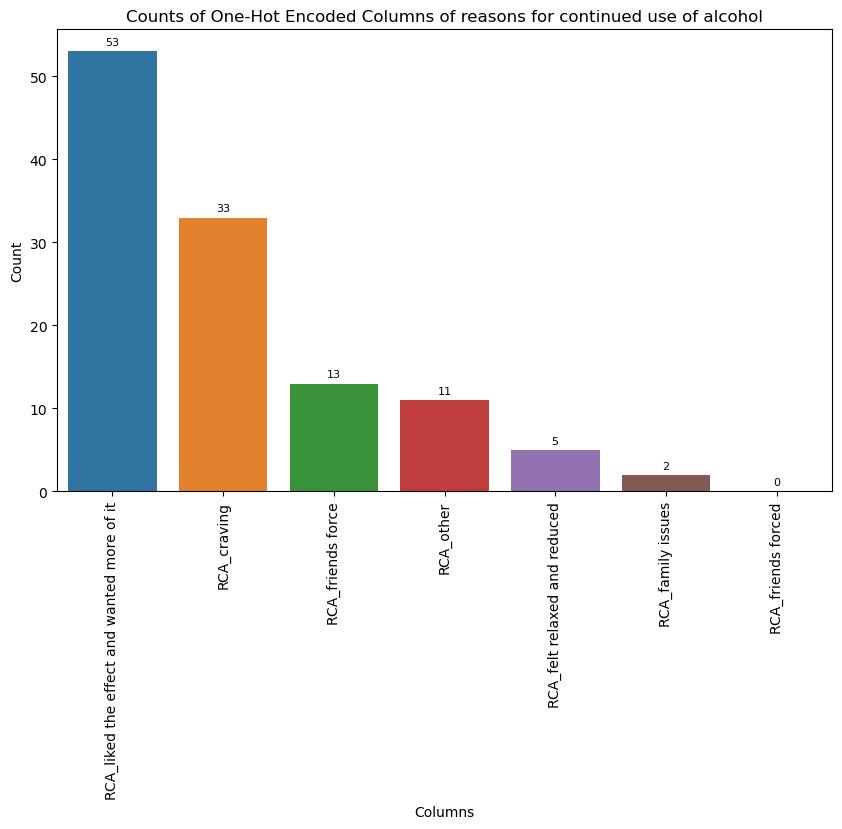

In [11]:
one_hot_cols = ['RCA_other','RCA_liked the effect and wanted more of it','RCA_friends force','RCA_craving','RCA_felt relaxed and reduced','RCA_family issues','RCA_friends forced']

# Calculate the counts for each category in the one-hot encoded columns
value_counts = data_copy5[one_hot_cols].sum().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=value_counts.index, y=value_counts)

plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Counts of One-Hot Encoded Columns of reasons for continued use of alcohol")

for i, v in enumerate(value_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

plt.show()

In [12]:
#data_v=data_copy3[['Risk Level','RCA_other'.'Chronic health problem','RCA_liked the effect and wanted more of it','Details of Debts to be cleared. If any mention the amount','RCA_friends force','RCA_craving','RCA_felt relaxed and reduced','RCA_family issues','RCA_friends forced','PCPR_aggressive outbursts','PCPR_confusion','PCPR_depression','PCPR_hallucinations','PCPR_ideas','PCPR_no','PCPR_paranoid','PCPR_seizure during withdrawal','PCPR_sucidal ideation or attempts','PCPR_tension','Father Alcoholic history','Brother Alcoholic history','AAO for alcohol in year','duration of use of alcohol','duration of excessive use of alcohol','avarage units used in last 30day','Age']].copy()

In [13]:
#data_v = data_copy3[['Risk Level', 'RCA_other','Marital Status', 'Chronic health problem', 'RCA_liked the effect and wanted more of it', 'Details of Debts to be cleared. If any mention the amount', 'RCA_friends force', 'RCA_craving', 'RCA_felt relaxed and reduced', 'RCA_family issues', 'RCA_friends forced', 'PCPR_aggressive outbursts', 'PCPR_confusion', 'PCPR_depression', 'PCPR_hallucinations', 'PCPR_ideas', 'PCPR_no', 'PCPR_paranoid', 'PCPR_seizure during withdrawal', 'PCPR_sucidal ideation or attempts', 'PCPR_tension', 'Father Alcoholic history', 'Brother Alcoholic history', 'AAO for alcohol in year', 'duration of use of alcohol', 'duration of excessive use of alcohol', 'Age']].copy()


In [14]:
data=data.drop(['Occupation','Last drink_Date','Assessment Date','Last Use','Other Issues','Unnamed: 0'],axis=1)

In [15]:
data['Age'].value_counts()

Adults               137
Middle Age Adults     93
Young Adult           36
Late Adults           30
Senior                 6
Teenage                1
Name: Age, dtype: int64

In [16]:
for i in range(len(data['Age'])):
    if data['Age'][i] in ['Adults']:
        data.loc[i, 'Age'] = 1
    elif data['Age'][i] in ['Middle Age Adults']:
        data.loc[i, 'Age'] = 2
    elif data['Age'][i] in ['Late Adults']:
        data.loc[i,'Age']=3
    elif data['Age'][i] in ['Young Adult']:
        data.loc[i,'Age']=4
    elif data['Age'][i] in ['Senior']:
        data.loc[i,'Age']=5
    else: 
        data.loc[i,'Age']=1

In [17]:
data['Education in year'].value_counts()

Secondary Education    114
Primary Education       71
PUC                     52
Uneducated              38
Bachelors               27
Masters                  1
Name: Education in year, dtype: int64

In [18]:
for i in range(len(data['Education in year'])):
    if data['Education in year'][i] in ['Secondary Education']:
        data.loc[i, 'Education in year'] = 2
    elif data['Education in year'][i] in ['Primary Education']:
        data.loc[i, 'Education in year'] = 1
    elif data['Education in year'][i] in ['PUC']:
        data.loc[i,'Education in year']=3
    elif data['Education in year'][i] in ['Uneducated']:
        data.loc[i,'Education in year']=4
    elif data['Education in year'][i] in ['Bachelors']:
        data.loc[i,'Education in year']=5
    else:
        data.loc[i,'Education in year']=6

In [19]:
data['Living arrangement'].value_counts()

Family       287
Relatives     11
Alone          3
Friends        2
Name: Living arrangement, dtype: int64

In [20]:
 for i in range(len(data['Living arrangement'])):
    if data['Living arrangement'][i] in ['Family']:
        data.loc[i, 'Living arrangement'] = 1
    elif data['Living arrangement'][i] in ['Relatives']:
        data.loc[i, 'Living arrangement'] = 2
    elif data['Living arrangement'][i] in ['Alone']:
        data.loc[i,'Living arrangement']=3
    elif data['Living arrangement'][i] in ['Friends']:
        data.loc[i,'Living arrangement']=4
    else:
        data.loc[i,'Living arrangement']=5

In [21]:
data['Alcohol'].value_counts()

Whisky        143
any            51
Any            45
Brandy         32
rum            11
beer            7
Beer            6
mc\noc          1
bpot            1
ocbp            1
alcohol         1
mcbeer          1
wiskeybeer      1
beermc          1
ib              1
Name: Alcohol, dtype: int64

In [22]:
data['Alcohol']=data['Alcohol'].replace('any','Any')
data['Alcohol']=data['Alcohol'].replace('beer','Beer')

In [23]:
 for i in range(len(data['Alcohol'])):
    if data['Alcohol'][i] in ['Whisky']:
        data.loc[i, 'Alcohol'] = 1
    elif data['Alcohol'][i] in ['Any']:
        data.loc[i, 'Alcohol'] = 2
    elif data['Alcohol'][i] in ['Brandy']:
        data.loc[i,'Alcohol']=3
    elif data['Alcohol'][i] in ['rum']:
        data.loc[i,'Alcohol']=4
    elif data['Alcohol'][i] in ['Beer']:
        data.loc[i,'Alcohol']=4
    elif data['Alcohol'][i] in ['bpot','ocbp','mcbeer','wiskeybeer','beermc']:
        data.loc[i,'Alcohol']=5
    else:
        data.loc[i,'Alcohol']=5

In [24]:
data['Denial of substance use related problems'].value_counts()

Moderate    292
Severe       11
Name: Denial of substance use related problems, dtype: int64

In [25]:
 for i in range(len(data['Denial of substance use related problems'])):
    if data['Denial of substance use related problems'][i] in ['Moderate']:
        data.loc[i, 'Denial of substance use related problems'] = 1
    elif data['Denial of substance use related problems'][i] in ['Severe']:
        data.loc[i, 'Denial of substance use related problems'] = 2

In [26]:
data['Motivation factor'].value_counts()

Moderate    251
Severe       44
mild          4
moderate      2
Willing       2
Name: Motivation factor, dtype: int64

In [27]:
data['Motivation factor']=data['Motivation factor'].replace(['moderate','mild'],'Moderate')

In [28]:
 for i in range(len(data['Motivation factor'])):
    if data['Motivation factor'][i] in ['Moderate']:
        data.loc[i, 'Motivation factor'] = 1
    elif data['Motivation factor'][i] in ['Severe']:
        data.loc[i, 'Motivation factor'] = 2
    elif data['Motivation factor'][i] in ['Willing']:
        data.loc[i, 'Motivation factor'] = 3    

In [29]:
data['Willingness for treatment'].value_counts()

Willing       258
Ambivalent     23
UnWilling      13
willing         9
Name: Willingness for treatment, dtype: int64

In [30]:
data['Willingness for treatment']=data['Willingness for treatment'].replace('willing','Willing')

In [31]:
 for i in range(len(data['Willingness for treatment'])):
    if data['Willingness for treatment'][i] in ['Willing']:
        data.loc[i, 'Willingness for treatment'] = 1
    elif data['Willingness for treatment'][i] in ['Ambivalent']:
        data.loc[i, 'Willingness for treatment'] = 2
    elif data['Willingness for treatment'][i] in ['UnWilling']:
        data.loc[i, 'Willingness for treatment'] = 3 

In [32]:
data['Sugar(mg)'].value_counts()

Normal      186
No           98
Diabetic     19
Name: Sugar(mg), dtype: int64

In [33]:
 for i in range(len(data['Sugar(mg)'])):
    if data['Sugar(mg)'][i] in ['Normal']:
        data.loc[i, 'Sugar(mg)'] = 1
    elif data['Sugar(mg)'][i] in ['No']:
        data.loc[i, 'Sugar(mg)'] = 2
    elif data['Sugar(mg)'][i] in ['Diabetic']:
        data.loc[i, 'Sugar(mg)'] = 3 

In [34]:
data['Knowledge of allergy to specific drugs(if known)'].value_counts()

No      299
Yes       3
None      1
Name: Knowledge of allergy to specific drugs(if known), dtype: int64

In [35]:
 for i in range(len(data['Knowledge of allergy to specific drugs(if known)'])):
    if data['Knowledge of allergy to specific drugs(if known)'][i] in ['Yes']:
        data.loc[i, 'Knowledge of allergy to specific drugs(if known)'] = 1
    elif data['Knowledge of allergy to specific drugs(if known)'][i] in ['No']:
        data.loc[i, 'Knowledge of allergy to specific drugs(if known)'] = 2
    else:
        data.loc[i, 'Knowledge of allergy to specific drugs(if known)'] = 3

In [36]:
data['Arranged Marriage/Love marriage'].value_counts()

arranged marriage    267
love marriage         29
others                 6
unmarried              1
Name: Arranged Marriage/Love marriage, dtype: int64

In [37]:
 for i in range(len(data['Arranged Marriage/Love marriage'])):
    if data['Arranged Marriage/Love marriage'][i] in ['arranged marriage']:
        data.loc[i, 'Arranged Marriage/Love marriage'] = 1
    elif data['Arranged Marriage/Love marriage'][i] in ['love marriage']:
        data.loc[i, 'Arranged Marriage/Love marriage'] = 2
    elif data['Arranged Marriage/Love marriage'][i] in ['others']:
        data.loc[i, 'Arranged Marriage/Love marriage'] = 3
    elif data['Arranged Marriage/Love marriage'][i] in ['unmarried']:
        data.loc[i, 'Arranged Marriage/Love marriage'] = 4 
    else:
        data.loc[i,'Arranged Marriage/Love marriage']=5;

In [38]:
data['multiple marriages'].value_counts()

No         216
-           55
Yes         24
yes          4
NO           1
38           1
20           1
11 year      1
Name: multiple marriages, dtype: int64

In [39]:
data['multiple marriages']=data['multiple marriages'].replace([38,20,'11 year','yes'],'Yes')
data['multiple marriages']=data['multiple marriages'].replace(['NO','-'],'No')

In [40]:
 for i in range(len(data['multiple marriages'])):
    if data['multiple marriages'][i] in ['Yes']:
        data.loc[i, 'multiple marriages'] = 1
    elif data['multiple marriages'][i] in ['no']:
        data.loc[i, 'multiple marriages'] = 2
    else:
        data.loc[i, 'multiple marriages'] = 2

In [41]:
data['Are you suspicious of your wife'].value_counts()

No     290
Yes     13
Name: Are you suspicious of your wife, dtype: int64

In [42]:
 for i in range(len(data['Are you suspicious of your wife'])):
    if data['Are you suspicious of your wife'][i] in ['Yes']:
        data.loc[i, 'Are you suspicious of your wife'] = 1
    elif data['Are you suspicious of your wife'][i] in ['No']:
        data.loc[i, 'Are you suspicious of your wife'] = 2
    else:
        data.loc[i, 'Are you suspicious of your wife'] = 2

In [43]:
data['Did you change Your job frequently due to addiction?'].value_counts()

No     294
-        5
Yes      4
Name: Did you change Your job frequently due to addiction?, dtype: int64

In [44]:
data['Did you change Your job frequently due to addiction?']=data['Did you change Your job frequently due to addiction?'].replace('-','No')

In [45]:
 for i in range(len(data['Did you change Your job frequently due to addiction?'])):
    if data['Did you change Your job frequently due to addiction?'][i] in ['Yes']:
        data.loc[i, 'Did you change Your job frequently due to addiction?'] = 1
    elif data['Did you change Your job frequently due to addiction?'][i] in ['No']:
        data.loc[i, 'Did you change Your job frequently due to addiction?'] = 2
    else:
        data.loc[i, 'Did you change Your job frequently due to addiction?'] = 2

In [46]:
data['Risk Level'].value_counts()

Very High Risk    251
High Risk          27
Low Risk           13
Medium Risk        12
Name: Risk Level, dtype: int64

In [47]:
 for i in range(len(data['Risk Level'])):
    if data['Risk Level'][i] in ['Very High Risk']:
        data.loc[i, 'Risk Level'] = 4
    elif data['Risk Level'][i] in ['High Risk']:
        data.loc[i, 'Risk Level'] = 3
    elif data['Risk Level'][i] in ['Low Risk']:
        data.loc[i, 'Risk Level'] = 1
    elif data['Risk Level'][i] in ['Medium Risk']:
        data.loc[i, 'Risk Level'] = 2
    else:
        data.loc[i, 'Risk Level'] = 2

In [48]:
data['Withdrawal Stage'] = 0
for i in data.index:
    if (data['WS_auditory'][i]) | (data['WS_illusion'][i]) | (data['WS_fits'][i]) | (data['WS_tremors'][i]):
        data['Withdrawal Stage'][i] = 3
    elif (data['WS_restlessness'][i]) | (data['WS_anxiety'][i]) |  (data['WS_palpitation'][i]) | (data['sweating'][i]):
        data['Withdrawal Stage'][i] = 2
    else:
        data['Withdrawal Stage'][i] = 1
data['Withdrawal Stage'].value_counts()

3    173
1     93
2     37
Name: Withdrawal Stage, dtype: int64

In [49]:
data.dtypes

S.N                                                                        int64
Age                                                                       object
Education in year                                                         object
Annual Income                                                              int64
Marital Status                                                             int64
Living arrangement                                                        object
Alcohol                                                                   object
AAO for alcohol in year                                                    int64
duration of use of alcohol                                                 int64
duration of excessive use of alcohol                                       int64
avarage units used in last 30days                                          int64
quantity of last drink                                                     int64
Nicotine (yes/NO)           

In [50]:
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression

In [51]:
target_col = "Period of sober"
X=data.loc[:,data.columns != target_col]
y=data.loc[:,target_col]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [53]:
data['Age']=data['Age'].astype('int32')
data['Education in year']=data['Education in year'].astype('int32')
data['Alcohol']=data['Alcohol'].astype('int32')
data['Living arrangement']=data['Living arrangement'].astype('int32')
data['Denial of substance use related problems']=data['Denial of substance use related problems'].astype('int32')
data['Motivation factor']=data['Motivation factor'].astype('int32')
data['Sugar(mg)']=data['Sugar(mg)'].astype('int32')

data['Willingness for treatment']=data['Willingness for treatment'].astype('int32')
data['Knowledge of allergy to specific drugs(if known)']=data['Knowledge of allergy to specific drugs(if known)'].astype('int32')
#data['year of Treated']=data['year of Treated'].astype('int32')
data['Arranged Marriage/Love marriage']=data['Arranged Marriage/Love marriage'].astype('int32')
data['multiple marriages']=data['multiple marriages'].astype('int32')
data['Risk Level']=data['Risk Level'].astype('int32')
data['Did you change Your job frequently due to addiction?']=data['Did you change Your job frequently due to addiction?'].astype('int32')


In [54]:
data['year of Treated'].value_counts()

2017                         53
2020                         36
2018                         35
2019                         29
2021                         24
2016                         18
2015                         17
2022                         13
2012                         11
2011                         10
2013                          7
2014                          7
2010                          5
2009                          4
2002                          2
2007                          2
8 days                        2
2005                          2
2004                          2
2017                          2
2016                          2
2021                          2
2018                          1
202                           1
2018 , 2020                   1
2000                          1
21 days                       1
6  Back                       1
2019                          1
8                             1
2022 , 2020 , 2022 , 2020     1
6       

In [55]:
data=data.drop('year of Treated',axis=1)

In [56]:
data.isna().sum() # checking for null values in the columns

S.N                                                                       0
Age                                                                       0
Education in year                                                         0
Annual Income                                                             0
Marital Status                                                            0
Living arrangement                                                        0
Alcohol                                                                   0
AAO for alcohol in year                                                   0
duration of use of alcohol                                                0
duration of excessive use of alcohol                                      0
avarage units used in last 30days                                         0
quantity of last drink                                                    0
Nicotine (yes/NO)                                                         0
smoking/smok

In [57]:
data['Period of Treatment']=data['Period of Treatment'].fillna(data['Period of Treatment'].median())
data['Number of year of marriage']=data['Number of year of marriage'].replace('Houewife',0)


In [58]:
data['Number of year of marriage']=data['Number of year of marriage'].fillna(data['Number of year of marriage'].median())
data['Number of year of marriage'].value_counts()

0       63
15      13
16      12
13      11
20       9
7        8
4        8
12.0     7
14       7
10       6
11       6
10       5
6        5
15       5
17       5
2        5
25       5
9        5
13       4
18       4
19       4
18       4
7        3
14       3
5        3
22       3
20       3
12       3
8        3
23       3
24       3
3        3
16       3
8        3
17       3
26       3
30       2
29       2
21       2
9        2
22       2
17       2
21       2
5        2
11       2
25       2
12       2
16       2
40       1
0.6      1
1.5      1
3.5      1
1.5      1
34       1
08       1
27       1
33       1
4.5      1
31       1
13       1
2.5      1
23       1
26       1
39       1
28       1
37       1
6        1
6.5      1
26       1
24       1
7        1
15       1
20       1
50       1
4        1
34       1
10       1
6        1
1.6      1
27       1
7.6      1
19       1
24       1
6        1
Name: Number of year of marriage, dtype: int64

In [59]:
data['Chronic health problem'].value_counts()
data=data.drop(['Chronic health problem','year of Education','Past Treatment History','Psychological factors of substances use continuation and relapse'],axis=1)

In [60]:
data['Psychological factors of substances use continuation and relapse'].value_counts()

KeyError: 'Psychological factors of substances use continuation and relapse'

In [61]:
data.dtypes

S.N                                                                        int64
Age                                                                        int32
Education in year                                                          int32
Annual Income                                                              int64
Marital Status                                                             int64
Living arrangement                                                         int32
Alcohol                                                                    int32
AAO for alcohol in year                                                    int64
duration of use of alcohol                                                 int64
duration of excessive use of alcohol                                       int64
avarage units used in last 30days                                          int64
quantity of last drink                                                     int64
Nicotine (yes/NO)           

In [62]:
data['How long have you been working?']=data['How long have you been working?'].fillna(data['How long have you been working?'].median())

In [63]:
data['Period of Treatment']=data['Period of Treatment'].fillna(data['Period of Treatment'].median())

In [64]:
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression

In [65]:
target_col = "Period of sober"
X=data.loc[:,data.columns != target_col]
y=data.loc[:,target_col]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [67]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
# SelectKBest feature selection
selector = SelectKBest(mutual_info_regression, k=50)
X_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_feature_names)


In [68]:
X_new_df

S.N Living arrangement Alcohol duration of use of alcohol  \
0    138                  1       1                        276   
1     83                  1       2                          9   
2     17                  1       2                        228   
3     11                  1       5                        276   
4    177                  1       3                        192   
5    169                  1       2                        240   
6    111                  1       4                        168   
7     79                  1       2                          6   
8    250                  1       2                        420   
9     45                  1       1                        132   
10    18                  1       1                        300   
11   140                  1       1                         72   
12   318                  1       1                        168   
13   298                  1       1                        288   
14    78                  1       1                         22   
15   122                  1       1                        348   
16    80                  1       1                         26   
17    39                  1       1                        216   
18   194                  1       1                        120   
19   168                  1       2                        192   
20   251                  1       2                         96   
21   322                  1       1                        120   
22    20                  1       2                        216   
23   201                  1       2                         60   
24   110                  1       1                         48   
25   199                  1       2                        180   
26   162                  1       1                        300   
27    99                  1       2                        156   
28   277                  1       1                        180   
29   316                  1       2                         60   
30   224                  1       2                        408   
31   315                  1       3                        336   
32   184                  1       1                        444   
33   255                  1       1                        144   
34   229                  1       3                        240   
35    64                  1       4                         31   
36   202                  1       1                        360   
37   325                  1       5                         84   
38   228                  1       2                        240   
39   143                  1       5                        264   
40    46                  2       1                        360   
41   262                  1       3                         84   
42   187                  1       2                        180   
43   154                  1       1                        120   
44   126                  1       2                        168   
45   186                  1       1                         72   
46   131                  1       1                         72   
47   305                  1       1                         84   
48   299                  1       1                        360   
49   179                  1       2                        240   
50   196                  1       1                        204   
51   198                  1       1                        240   
52     3                  1       1                        120   
53   129                  1       1                        348   
54   161                  1       4                          8   
55   197                  1       2                        180   
56   134                  1       1                        264   
57   233                  1       1                        384   
58   286                  1       2                        300   
59   141                  1       2          

In [69]:
from sklearn.feature_selection import SelectKBest, chi2
# SelectKBest feature selection
selector = SelectKBest(chi2, k=30)
X_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_new_df2 = pd.DataFrame(X_new, columns=selected_feature_names)

In [70]:
X_new_df2

S.N Annual Income AAO for alcohol in year duration of use of alcohol  \
0    138         30000                     252                        276   
1     83        100000                     240                          9   
2     17         15000                     240                        228   
3     11        120000                     312                        276   
4    177        200000                     216                        192   
5    169         50000                     180                        240   
6    111         20000                     276                        168   
7     79         15000                     324                          6   
8    250        150000                     180                        420   
9     45         15000                     396                        132   
10    18         80000                     264                        300   
11   140         50000                     336                         72   
12   318         10000                     216                        168   
13   298        300000                     204                        288   
14    78        200000                     192                         22   
15   122         20000                     180                        348   
16    80        100000                     264                         26   
17    39        100000                     252                        216   
18   194         75000                     300                        120   
19   168         50000                     348                        192   
20   251         15000                     228                         96   
21   322         50000                     288                        120   
22    20         20000                     240                        216   
23   201         50000                     240                         60   
24   110         50000                     156                         48   
25   199         30000                     300                        180   
26   162         50000                     240                        300   
27    99         25000                     324                        156   
28   277         60000                     228                        180   
29   316        200000                     216                         60   
30   224         50000                     204                        408   
31   315        100000                     240                        336   
32   184        110000                     192                        444   
33   255         15000                     240                        144   
34   229         11000                     240                        240   
35    64         50000                     192                         31   
36   202         50000                     276                        360   
37   325         60000                     312                         84   
38   228         15000                     216                        240   
39   143         50000                     276                        264   
40    46        100000                     360                        360   
41   262         40000                     336                         84   
42   187         10000                     216                        180   
43   154        100000                     360                        120   
44   126         50000                     204                        168   
45   186        120000                     312                         72   
46   131         20000                     264                         72   
47   305         50000                     336                         84   
48   299         35000                     180                        360   
49   179         20000                     144                        240   
50   196         10000                     216                        204   
5

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Initialize the feature selector
selector = SelectKBest(f_classif, k=10)

# Perform feature selection on the training data
X_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_new_df3 = pd.DataFrame(X_new, columns=selected_feature_names)


In [72]:
X_new_df3

Period of Treatment MPPR_haematemesis MPPR_loss of apataites CHP_gastric  \
0                   8.0                 0                      0           0   
1                   8.0                 0                      0           0   
2                   8.0                 0                      0           0   
3                   1.0                 0                      0           0   
4                   8.0                 0                      0           0   
5                2920.0                 0                      0           0   
6                  24.0                 0                      0           0   
7                   8.0                 0                      0           0   
8                   7.0                 0                      0           0   
9                 248.0                 0                      0           0   
10                 19.0                 0                      0           0   
11                  8.0                 0                      0           0   
12               4545.0                 0                      0           0   
13                 31.0                 0                      0           0   
14                  8.0                 0                      0           0   
15                  8.0                 0                      0           0   
16                  8.0                 0                      1           0   
17                  8.0                 0                      0           0   
18                  8.0                 0                      0           0   
19                 31.0                 0                      0           0   
20                  8.0                 0                      0           0   
21                  8.0                 0                      0           0   
22                  8.0                 0                      0           0   
23                 25.0                 0                      0           0   
24                 62.0                 0                      0           0   
25                 62.0                 0                      0           0   
26                  8.0                 0                      0           0   
27                 15.0                 0                      0           0   
28                 15.0                 0                      0           0   
29                  8.0                 0                      0           0   
30                  8.0                 0                      0           0   
31                  8.0                 0                      0           0   
32                  8.0                 0                      0           0   
33                  8.0                 0                      0           0   
34                  8.0                 0                      0           0   
35                 31.0                 0                      0           0   
36                 15.0                 0                      0           0   
37                 10.0                 0                      0           0   
38                  8.0                 0                      0           0   
39                  8.0                 0                      0           0   
40                  8.0                 0                      0           0   
41                  8.0                 0                      0           0   
42                  8.0                 0                      0           0   
43                730.0                 0                      0           0   
44                  8.0                 0                      0           0   
45                  8.0                 0                      0           0   
46                  8.0                 0                      0           0   
47                 93.0                 0                      0           0   
48                 21.0                 0                      0           0   
49  

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


label_quality = LabelEncoder()
X_new_df2['Period of Sober1'] = label_quality.fit_transform(X_new_df2['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(X_new_df2, X_new_df2['Period of Sober1'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.018867924528301886, 0.05660377358490566]}

In [74]:
acc_table = pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table
acc_table.to_excel('pred.xlsx')

In [75]:
label_quality = LabelEncoder()
X_new_df3['Period of Sober1'] = label_quality.fit_transform(X_new_df3['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(X_new_df3, X_new_df3['Period of Sober1'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

KeyError: 'Period of Sober1'

In [76]:
label_quality = LabelEncoder()
X_new_df2['Period of Sober1'] = label_quality.fit_transform(X_new_df2['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(data, data['Period of Sober1'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.06578947368421052, 0.5526315789473685]}

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X_new_df3, X_new_df3['Period of Sober1'], test_size = 0.25, random_state = 42)

# Train the random forest classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy
print("Accuracy:", accuracy)


KeyError: 'Period of Sober1'

In [78]:
test_data = data.drop(['Period of Sober1','Age'],axis = 1)

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,1:]  #independent columns   
y = data["Period of Sober1"]   #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))
features = featureScores.nlargest(30,'Score')
features.to_excel('feature.xlsx')

                                                 Specs         Score
2                                        Annual Income  7.380696e+07
35   Details of Debts to be cleared. If any mention...  2.204176e+07
122                                   Period of Sober1  1.341353e+06
24                                 Period of Treatment  3.496532e+05
25                                     Period of sober  3.364218e+05
8                 duration of excessive use of alcohol  2.731273e+05
118                               Period of Treatment1  6.431936e+04
115                    Year of Treatment (Second time)  4.300014e+04
10                              quantity of last drink  8.052685e+03
114                     Year of Treatment (First time)  7.651047e+03
9                    avarage units used in last 30days  7.200207e+03
119                               Period of Treatment2  3.284517e+03
7                           duration of use of alcohol  3.244127e+03
38                                

[1.25945918e-02 1.32506167e-02 1.53159296e-02 7.64974735e-03
 2.95070728e-03 1.66036087e-02 1.71904181e-02 1.56595087e-02
 1.56509868e-02 1.25216213e-02 1.40414535e-02 1.12678453e-02
 9.73329851e-03 2.35572477e-03 7.82452052e-03 7.40356809e-03
 1.60443300e-02 1.49328817e-02 1.47317176e-02 1.30243529e-02
 9.33615687e-03 9.33147721e-03 8.04796327e-04 1.85376739e-03
 1.23063343e-02 7.77091690e-02 7.14263444e-03 1.55953441e-02
 5.09327345e-03 4.48395686e-03 2.36852488e-03 1.63349988e-02
 1.66745574e-02 6.95633614e-04 7.99863107e-03 4.67360525e-03
 1.18290414e-02 1.69513174e-02 1.49961112e-02 7.40309735e-03
 1.16102504e-03 3.37900178e-03 2.35882730e-03 9.10047217e-03
 4.66181185e-03 6.70289212e-03 4.91405321e-03 9.79145686e-04
 8.05606795e-03 1.10833843e-02 8.68052170e-03 1.19098809e-02
 6.43911836e-03 2.23538010e-03 8.78140301e-05 9.28029768e-03
 8.86507616e-03 6.72887258e-03 2.54359047e-04 4.59976818e-03
 3.28076456e-03 5.74297000e-03 7.46147260e-04 2.95969116e-03
 5.24475540e-04 9.063683

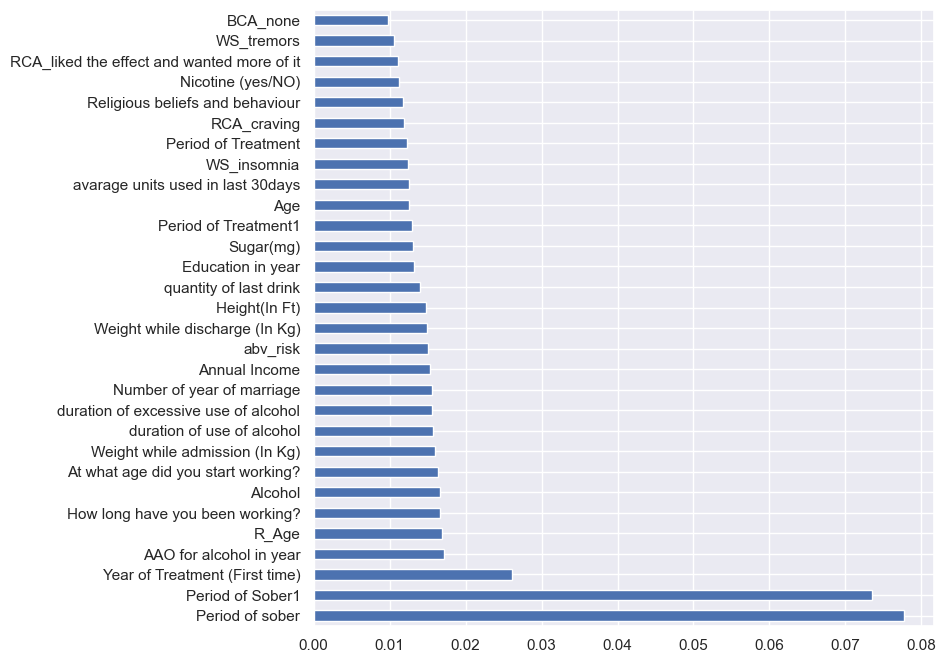

In [80]:
sns.set(rc = {'figure.figsize':(8,8)},font_scale = 1)
X = data.iloc[:,1:]  #independent columns   
y = data["Period of Sober1"]   #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [81]:
from sklearn.feature_selection import mutual_info_classif

# X is your feature matrix (discrete data with 0 and 1)
# y is your target variable
X = data.iloc[:,1:]  #independent columns   
y = data["Period of Sober1"] 

# Compute information gain for each feature
information_gain = mutual_info_classif(X, y)

# Print information gain scores for each feature
for i, feature in enumerate(X.columns):
    print(f"Information gain for {feature}: {information_gain[i]}")

Information gain for Age: 0.18483684815157764
Information gain for Education in year: 0.02540702116727722
Information gain for Annual Income: 0.06228234391008236
Information gain for Marital Status: 0.6270157015634226
Information gain for Living arrangement: 0.8925228977264181
Information gain for Alcohol: 0.17896105946143415
Information gain for AAO for alcohol in year: 0.0
Information gain for duration of use of alcohol: 0.0
Information gain for duration of excessive use of alcohol: 0.06643111805642654
Information gain for avarage units used in last 30days: 0.0
Information gain for quantity of last drink: 0.13630211333173614
Information gain for Nicotine (yes/NO): 0.3516184588405413
Information gain for smoking/smokeless: 0.5060383469011529
Information gain for Denial of substance use related problems: 0.7645712417524329
Information gain for Motivation factor: 0.6520976635734295
Information gain for Willingness for treatment: 0.815742272583742
Information gain for Weight while admiss

In [82]:
dataa=data[['Marital Status','Living arrangement','smoking/smokeless','Motivation factor','Willingness for treatment','Sugar(mg)','Period of sober','Arranged Marriage/Love marriage','multiple marriages','Did you change Your job frequently due to addiction?','Risk Level','RCA_liked the effect and wanted more of it','MPPR_no','Number of relapses (based on period of treatment)','Number of relapses (based on treatment year)','Period of Sober1']]
dataa

Marital Status  Living arrangement  smoking/smokeless  Motivation factor  \
0                 1                   1                  1                  1   
1                 1                   1                  1                  1   
2                 0                   1                  1                  1   
3                 1                   1                  1                  1   
4                 1                   1                  1                  1   
5                 0                   1                  1                  2   
6                 1                   1                  1                  1   
7                 1                   1                  1                  2   
8                 1                   1                  1                  1   
9                 1                   1                  1                  2   
10                1                   1                  1                  1   
11                0                   4                  1                  1   
12                0                   1                  1                  1   
13                1                   1                  1                  1   
14                0                   1                  1                  1   
15                0                   1                  1                  1   
16                1                   1                  1                  1   
17                0                   1                  1                  2   
18                1                   1                  1                  1   
19                0                   1                  1                  1   
20                1                   2                  1                  2   
21                1                   1                  1                  1   
22                1                   1                  0                  1   
23                1                   1                  1                  1   
24                1                   1                  1                  1   
25                1                   4                  1                  1   
26                1                   1                  0                  1   
27                0                   2                  1                  1   
28                1                   1                  0                  1   
29                1                   1                  1                  1   
30                1                   2                  0                  1   
31                1                   1                  1                  1   
32                1                   2                  0                  1   
33                1                   1                  1                  1   
34                1                   1                  0                  2   
35                0                   1                  1                  1   
36                0                   1                  1                  1   
37                1                   1                  1                  2   
38                1                   2                  1                  1   
39                1                   1                  1                  2   
40                1                   1                  1                  1   
41                1                   1                  1                  2   
42                1                   1                  1                  1   
43                1                   1                  1                  1   
44                1                   1                  1                  1   
45                0                   1                  1                  1   
46                0                   1                  1                  1   
47                0                   1                  1                  1   
48                1                 

In [83]:
label_quality = LabelEncoder()
dataa['Period of Sober1'] = label_quality.fit_transform(dataa['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(dataa, dataa['Period of Sober1'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.8947368421052632, 0.9736842105263158]}

In [84]:
target_col = "Period of sober"
X=dataa.loc[:,dataa.columns != target_col]
y=dataa.loc[:,target_col]

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Initialize the feature selector
selector = SelectKBest(f_classif, k=10)

# Perform feature selection on the training data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_ = pd.DataFrame(X_new, columns=selected_feature_names)

In [86]:
X_

Marital Status  smoking/smokeless  Motivation factor  \
0                 1                  1                  1   
1                 1                  1                  1   
2                 0                  1                  1   
3                 1                  1                  1   
4                 1                  1                  1   
5                 0                  1                  2   
6                 1                  1                  1   
7                 1                  1                  2   
8                 1                  1                  1   
9                 1                  1                  2   
10                1                  1                  1   
11                0                  1                  1   
12                0                  1                  1   
13                1                  1                  1   
14                0                  1                  1   
15                0                  1                  1   
16                1                  1                  1   
17                0                  1                  2   
18                1                  1                  1   
19                0                  1                  1   
20                1                  1                  2   
21                1                  1                  1   
22                1                  0                  1   
23                1                  1                  1   
24                1                  1                  1   
25                1                  1                  1   
26                1                  0                  1   
27                0                  1                  1   
28                1                  0                  1   
29                1                  1                  1   
30                1                  0                  1   
31                1                  1                  1   
32                1                  0                  1   
33                1                  1                  1   
34                1                  0                  2   
35                0                  1                  1   
36                0                  1                  1   
37                1                  1                  2   
38                1                  1                  1   
39                1                  1                  2   
40                1                  1                  1   
41                1                  1                  2   
42                1                  1                  1   
43                1                  1                  1   
44                1                  1                  1   
45                0                  1                  1   
46                0                  1                  1   
47                0                  1                  1   
48                1                  1                  1   
49                1                  1                  1   
50                1                  1                  1   
51                1                  1                  1   
52                0                  1                  1   
53                1                  1                  1   
54                1                  1                  1   
55                1                  1                  1   
56                1                  1                  1   
57                1                  0                  1   
58                1                  0                  1   
59                0                  0                  1   
60                0                  1                  1   
61                1                  1                  1   
62                1                  1                  1   
63                1                  1                  1   
64                1                  1  

In [87]:
label_quality = LabelEncoder()
X_['Period of Sober1'] = label_quality.fit_transform(X_['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(X_, X_['Period of Sober1'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.7894736842105263, 0.9078947368421053]}

In [88]:
#data=data.drop(['Period of Treatment2','Period of Treatment3','Period of Sober2','Period of Sober3'],axis=1)
data

S.N  Age  Education in year  Annual Income  Marital Status  \
0      1    2                  2          15000               1   
1      2    1                  2          80000               1   
2      3    1                  3          60000               0   
3      4    1                  3          75000               1   
4      5    2                  2          10000               1   
5      6    4                  3          50000               0   
6      7    2                  4          10000               1   
7      8    2                  5         600000               1   
8      9    2                  2         150000               1   
9     10    1                  5         600000               1   
10    11    2                  5         120000               1   
11    12    1                  2          50000               0   
12    13    4                  1          95000               0   
13    15    2                  1         200000               1   
14    16    4                  3          30000               0   
15    17    1                  1          15000               0   
16    18    2                  2          80000               1   
17    19    2                  2         200000               0   
18    20    1                  2          20000               1   
19    21    4                  3         200000               0   
20    22    2                  3         100000               1   
21    26    2                  4          35000               1   
22    27    2                  4          20000               1   
23    29    1                  1          50000               1   
24    30    2                  5         150000               1   
25    31    5                  1          90000               1   
26    32    1                  5          50000               1   
27    33    4                  2          50000               0   
28    35    2                  1          90000               1   
29    36    2                  5         200000               1   
30    37    2                  1          20000               1   
31    39    1                  4         100000               1   
32    40    2                  4         100000               1   
33    41    2                  5         300000               1   
34    42    2                  5          50000               1   
35    43    4                  3          50000               0   
36    44    4                  5          50000               0   
37    45    2                  2          15000               1   
38    46    5                  1         100000               1   
39    47    2                  4         300000               1   
40    48    1                  1          50000               1   
41    49    2                  2          50000               1   
42    50    1                  1          50000               1   
43    51    3                  5          50000               1   
44    52    2                  4          50000               1   
45    53    1                  2          50000               0   
46    55    1                  2          50000               0   
47    56    1                  1          50000               0   
48    57    3                  2        3000000               1   
49    58    1                  5         250000               1   
50    59    2                  1          80000               1   
51    60    1                  5         200000               1   
52    61    1                  3          20000               0   
53    62    1                  2          15000               1   
54    63    1                  2          20000               1   
55    64    2                  1          50000               1   
56    65    1                  2         100000               1   
57    66    3                  1          11000               1   
58    67    1                  1          11000     

In [89]:
dataa=data[['Age','Education in year','duration of use of alcohol','Period of sober','duration of excessive use of alcohol','Risk Level','RSA_someone in family or friends were using','RCA_liked the effect and wanted more of it','RCA_friends force','Stressor_absent','PCP_confusion','PCP_depression','MPPR_no','CHP_no','PCP_no','PCPR_no','PCPR_depression','BCA_none','WS_insomnia','Motivation factor','Willingness for treatment','sweating','WS_tremors','PFR_other isseus','Withdrawal Stage','RCA_craving']]
dataa

KeyError: "['PFR_other isseus'] not in index"

In [90]:
target_col = "Period of sober"
X=dataa.loc[:,dataa.columns != target_col]
y=dataa.loc[:,target_col]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [91]:
dataa.shape

(303, 16)

In [92]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Initialize the feature selector
selector = SelectKBest(f_classif, k=20)

# Perform feature selection on the training data
X_new = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_ = pd.DataFrame(X_new, columns=selected_feature_names)

ValueError: k should be >=0, <= n_features = 15; got 20. Use k='all' to return all features.

In [93]:
bins = [1, 30, 90, 180, 270,365,3650] 
labels = ['1-30', '30-90', '90-180','180-270','270-365','365-3650']
dataa['Period of Sober Group'] = pd.cut(dataa['Period of sober'], bins=bins, labels=labels,right=False)

In [94]:
dataa['Period of Sober Group']=dataa['Period of Sober Group'].fillna(dataa['Period of Sober Group'].mode()[0])


In [95]:
X_['Period of Sober Group']=dataa['Period of Sober Group']

In [96]:
label_quality = LabelEncoder()
X_['Period of Sober Group'] = label_quality.fit_transform(X_['Period of Sober Group'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(X_, X_['Period of Sober Group'], test_size = 0.25, random_state = 42)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.9868421052631579, 0.9868421052631579]}

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X_, X_['Period of Sober Group'], test_size = 0.25, random_state = 42)

# Train the random forest classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9868421052631579


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_positive = cm[1, 1]  # Number of true positive predictions
true_negative = cm[0, 0]  # Number of true negative predictions
false_positive = cm[0, 1]  # Number of false positive predictions
false_negative = cm[1, 0]  # Number of false negative predictions

# Calculate the total number of predictions
total_predictions = true_positive + true_negative + false_positive + false_negative

# Print the results
print("Correctly Predicted:", true_positive + true_negative)
print("Incorrectly Predicted:", false_positive + false_negative)


Correctly Predicted: 18
Incorrectly Predicted: 0


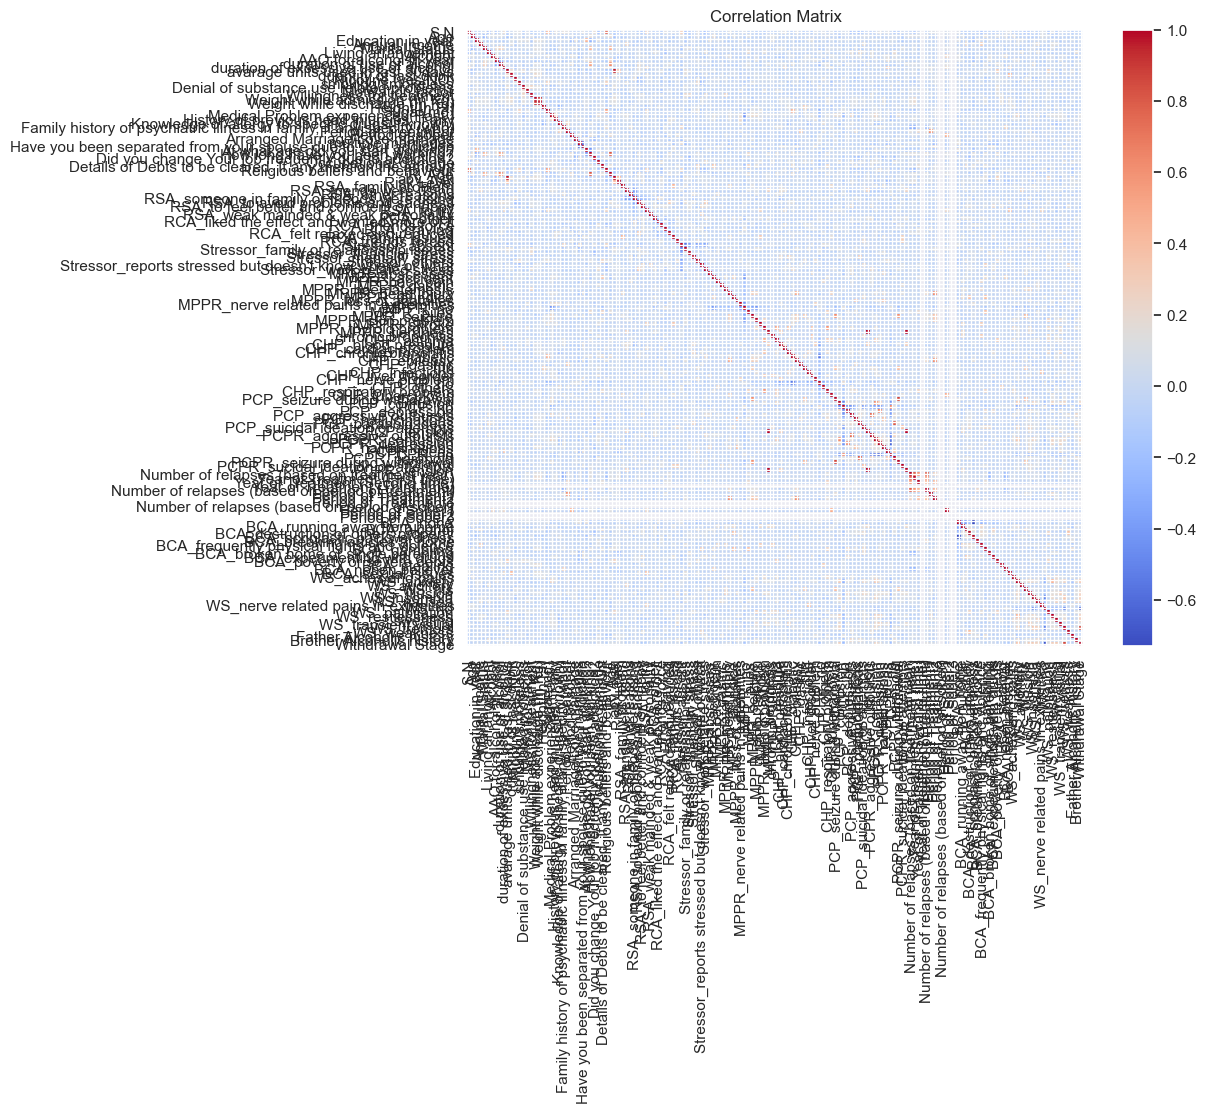

In [99]:
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


S.N  Age  Education in year  Annual Income  Marital Status  \
0      1    2                  2          15000               1   
1      2    1                  2          80000               1   
2      3    1                  3          60000               0   
3      4    1                  3          75000               1   
4      5    2                  2          10000               1   
5      6    4                  3          50000               0   
6      7    2                  4          10000               1   
7      8    2                  5         600000               1   
8      9    2                  2         150000               1   
9     10    1                  5         600000               1   
10    11    2                  5         120000               1   
11    12    1                  2          50000               0   
12    13    4                  1          95000               0   
13    15    2                  1         200000               1   
14    16    4                  3          30000               0   
15    17    1                  1          15000               0   
16    18    2                  2          80000               1   
17    19    2                  2         200000               0   
18    20    1                  2          20000               1   
19    21    4                  3         200000               0   
20    22    2                  3         100000               1   
21    26    2                  4          35000               1   
22    27    2                  4          20000               1   
23    29    1                  1          50000               1   
24    30    2                  5         150000               1   
25    31    5                  1          90000               1   
26    32    1                  5          50000               1   
27    33    4                  2          50000               0   
28    35    2                  1          90000               1   
29    36    2                  5         200000               1   
30    37    2                  1          20000               1   
31    39    1                  4         100000               1   
32    40    2                  4         100000               1   
33    41    2                  5         300000               1   
34    42    2                  5          50000               1   
35    43    4                  3          50000               0   
36    44    4                  5          50000               0   
37    45    2                  2          15000               1   
38    46    5                  1         100000               1   
39    47    2                  4         300000               1   
40    48    1                  1          50000               1   
41    49    2                  2          50000               1   
42    50    1                  1          50000               1   
43    51    3                  5          50000               1   
44    52    2                  4          50000               1   
45    53    1                  2          50000               0   
46    55    1                  2          50000               0   
47    56    1                  1          50000               0   
48    57    3                  2        3000000               1   
49    58    1                  5         250000               1   
50    59    2                  1          80000               1   
51    60    1                  5         200000               1   
52    61    1                  3          20000               0   
53    62    1                  2          15000               1   
54    63    1                  2          20000               1   
55    64    2                  1          50000               1   
56    65    1                  2         100000               1   
57    66    3                  1          11000               1   
58    67    1                  1          11000     